Deep Learning Project - Image classification for Emotion Detection 

Fahad Ahmad

Libraries needed for the Project

In [2]:
!pip install numpy
!pip install opencv-python
!pip install keras
!pip3 install --upgrade tensorflow
!pip install pillow
!pip install tensorflow
!pip install tensorflow==2.8.0  


  Using cached opencv_python-4.9.0.80-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (62.2 MB)
  Using cached keras-3.0.5-py3-none-any.whl.metadata (4.8 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached keras-3.0.5-py3-none-any.whl (1.0 MB)
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
Using cached dm_tree-0.1.8-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (152 kB)
Using cached ml_dtypes-0.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
Using cached namex-0.0.7-py3-none-any.whl (5.8 kB)
  Using cached tensorflow-2.15.0.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-2

Simple Neural Network

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator


2024-02-27 03:04:46.745628: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-27 03:04:46.799554: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-27 03:04:46.922601: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 03:04:46.922648: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 03:04:46.932655: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [4]:
# Set the path to your dataset
train_dir = 'images/train'
validation_dir = 'images/test'

# Initialize the data generators
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),  # Assuming all images are resized to 48x48 pixels
    batch_size=32,
    color_mode='grayscale',  # Assuming images are grayscale
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical')


Found 28822 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [5]:
model = Sequential([
    Flatten(input_shape=(48, 48, 1)),  # Adjust based on your input image size
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(7, activation='softmax')  # Output layer with 7 neurons (for 7 emotions)
])


In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)


Epoch 1/10
901/901 [==============================] - 216s 239ms/step - loss: 1.7779 - accuracy: 0.2816 - val_loss: 1.7157 - val_accuracy: 0.3312
Epoch 2/10
901/901 [==============================] - 186s 207ms/step - loss: 1.7010 - accuracy: 0.3274 - val_loss: 1.6924 - val_accuracy: 0.3334
Epoch 3/10
901/901 [==============================] - 181s 200ms/step - loss: 1.6720 - accuracy: 0.3454 - val_loss: 1.6511 - val_accuracy: 0.3500
Epoch 4/10
901/901 [==============================] - 174s 193ms/step - loss: 1.6509 - accuracy: 0.3515 - val_loss: 1.6401 - val_accuracy: 0.3598
Epoch 5/10
901/901 [==============================] - 196s 218ms/step - loss: 1.6366 - accuracy: 0.3564 - val_loss: 1.6379 - val_accuracy: 0.3551
Epoch 6/10
901/901 [==============================] - 221s 246ms/step - loss: 1.6278 - accuracy: 0.3605 - val_loss: 1.6211 - val_accuracy: 0.3663
Epoch 7/10
901/901 [==============================] - 191s 212ms/step - loss: 1.6196 - accuracy: 0.3676 - val_loss: 1.6482 -

In [8]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation loss: {val_loss}")
print(f"Validation accuracy: {val_accuracy}")


221/221 [==============================] - 41s 184ms/step - loss: 1.6256 - accuracy: 0.3650
Validation loss: 1.6255671977996826
Validation accuracy: 0.36498725414276123


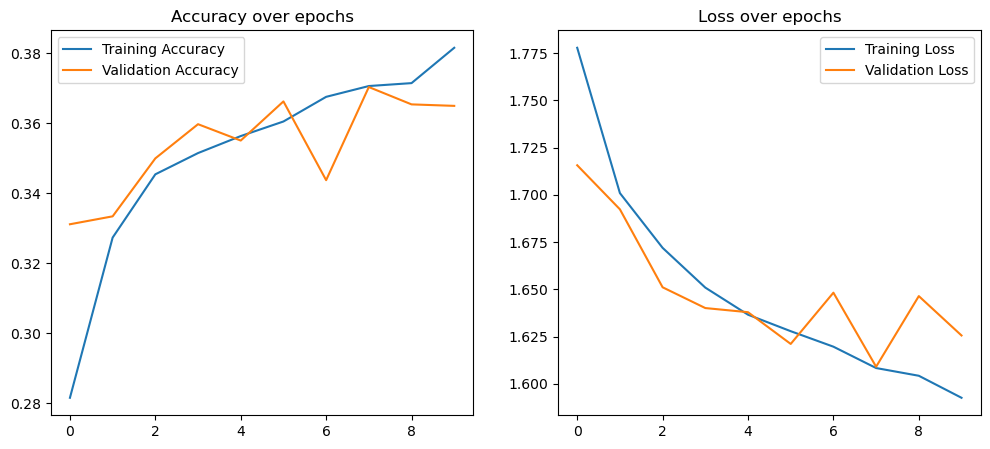

In [9]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.legend()

plt.show()


In our deep learning project focused on emotion detection, for a simple model we employed a straightforward neural network architecture to classify images into one of seven emotions. The data preprocessing was executed using ImageDataGenerators for both training and validation datasets, which rescaled the images to a consistent size of 48x48 pixels and converted them to grayscale to reduce complexity while preserving the essential features for emotion recognition. Our model's architecture began with a Flatten layer to transform the 2D image arrays into a 1D vector. This was followed by a dense layer containing 128 neurons with ReLU activation to enable the learning of complex patterns through non-linear transformations. The output layer consisted of 7 neurons, each representing a different emotion, and used softmax activation to generate a probability distribution across these classes.

The model was compiled with the Adam optimizer and the categorical crossentropy loss function, which are commonly used in multi-class classification tasks. After training over 10 epochs, the model reached a validation accuracy of approximately 36.5% and a validation loss of 1.626. These outcomes suggest that while the model can identify emotions to a certain degree, its performance is modest, highlighting the model's limitations in effectively discerning emotions from images.


In [ ]:
######################

Moving to complex models

Convolutional Neural Network 

In [12]:
# import required packages
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

Preprocessing of Data for CNN and CNN Model

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import cv2

# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all training images
train_generator = train_data_gen.flow_from_directory(
        'images/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# Preprocess all validation images
validation_generator = validation_data_gen.flow_from_directory(
        'images/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# Create model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

# Compile the model with updated parameters
emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])


Found 28822 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


This code outlines the creation of a Convolutional Neural Network (CNN) for facial emotion recognition, leveraging a dataset of 48x48 pixel grayscale images. It employs a sequential model architecture with layers designed for feature extraction—specifically, convolutional layers with ReLU activation followed by max pooling to reduce dimensionality, and dropout layers to prevent overfitting, with dropout rates of 0.25 and 0.5 at different stages of the model.

The network finalizes with a dense layer of 1024 neurons, leading to a 7-neuron output layer with softmax activation for classifying images into seven emotion categories. This setup uses the Adam optimizer with a learning rate of 0.0001 and aims to minimize the categorical crossentropy loss, focusing on achieving high accuracy in emotion detection from facial images.


In [14]:

# Train the neural network/model using `fit` instead of `fit_generator`
emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

   


Epoch 1/50
448/448 [==============================] - 242s 537ms/step - loss: 1.8011 - accuracy: 0.2570 - val_loss: 1.6986 - val_accuracy: 0.3558
Epoch 2/50
448/448 [==============================] - 239s 534ms/step - loss: 1.6167 - accuracy: 0.3730
Epoch 3/50
448/448 [==============================] - 217s 485ms/step - loss: 1.5106 - accuracy: 0.4186
Epoch 4/50
448/448 [==============================] - 208s 464ms/step - loss: 1.4349 - accuracy: 0.4498
Epoch 5/50
448/448 [==============================] - 218s 486ms/step - loss: 1.3743 - accuracy: 0.4771
Epoch 6/50
448/448 [==============================] - 214s 478ms/step - loss: 1.3250 - accuracy: 0.4954
Epoch 7/50
448/448 [==============================] - 222s 496ms/step - loss: 1.2850 - accuracy: 0.5117
Epoch 8/50
448/448 [==============================] - 218s 488ms/step - loss: 1.2447 - accuracy: 0.5319
Epoch 9/50
448/448 [==============================] - 228s 508ms/step - loss: 1.2172 - accuracy: 0.5428
Epoch 10/50
448/448 [=

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the test data generator
test_data_gen = ImageDataGenerator(rescale=1./255)

# Load test images
test_generator = test_data_gen.flow_from_directory(
        'images/test',  # Path to the test data
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=False)  # Important for later evaluation steps


Found 7066 images belonging to 7 classes.


In [17]:
# Evaluate the model on the test data
test_loss, test_accuracy = emotion_model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


110/110 [==============================] - 15s 137ms/step - loss: 1.1978 - accuracy: 0.6308
Test Loss: 1.1978124380111694
Test Accuracy: 0.6308238506317139


The evaluation results show that the model achieves a loss of 1.1978 and an accuracy of 63.08% on the test data. The "loss" measures how well the model's predictions match the actual labels, with lower values indicating better performance. The "accuracy" is the proportion of correctly predicted instances among the total number of predictions, with higher percentages indicating better performance. In this case, the model correctly predicts the facial expression category for approximately 63.08% of the test images, which can be considered as its effectiveness in recognizing facial expressions based on the learned patterns during training.

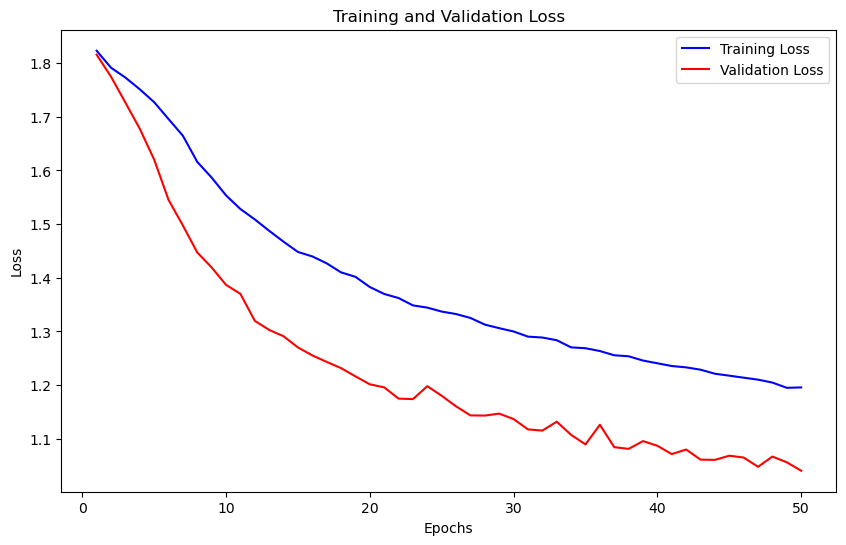

In [39]:
import matplotlib.pyplot as plt

# Extracting loss values from the history object
training_loss = emotion_model_info.history['loss']
validation_loss = emotion_model_info.history['val_loss']

# Extracting the number of epochs
epochs = range(1, len(training_loss) + 1)

# Plotting training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, 'b-', label='Training Loss')
plt.plot(epochs, validation_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [24]:
import numpy as np

# Make predictions
predictions = emotion_model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  # Getting the mapping of class indices to labels

# Compare predictions with true labels for analysis
from sklearn.metrics import classification_report
print(classification_report(true_classes[:len(predicted_classes)], predicted_classes, target_names=class_labels))


110/110 [==============================] - 16s 145ms/step
              precision    recall  f1-score   support

       angry       0.54      0.55      0.54       960
     disgust       0.71      0.56      0.63       111
        fear       0.59      0.38      0.46      1018
       happy       0.81      0.83      0.82      1825
     neutral       0.54      0.60      0.57      1216
         sad       0.47      0.56      0.51      1139
    surprise       0.75      0.76      0.76       771

    accuracy                           0.63      7040
   macro avg       0.63      0.61      0.61      7040
weighted avg       0.63      0.63      0.63      7040



In [ ]:
#########################

Model training with learning rate scheduler to improve accuracy.

In [26]:

from tensorflow.keras.callbacks import LearningRateScheduler


In [27]:
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np

# Define a scheduler function
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

# Create a callback for the learning rate scheduler
lr_scheduler = LearningRateScheduler(scheduler)


In [28]:
# Train the neural network/model using `fit` and include the learning rate scheduler callback
emotion_model_info = emotion_model.fit(
    train_generator,
    steps_per_epoch=28709 // 64,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=7178 // 64,
    callbacks=[lr_scheduler]  # Add the learning rate scheduler callback here
)


Epoch 1/50
448/448 [==============================] - 244s 545ms/step - loss: 0.3659 - accuracy: 0.8696 - val_loss: 1.2197 - val_accuracy: 0.6316 - lr: 1.0000e-04
Epoch 2/50
448/448 [==============================] - 228s 508ms/step - loss: 0.3568 - accuracy: 0.8733 - lr: 1.0000e-04
Epoch 3/50
448/448 [==============================] - 231s 515ms/step - loss: 0.3433 - accuracy: 0.8788 - lr: 1.0000e-04
Epoch 4/50
448/448 [==============================] - 228s 508ms/step - loss: 0.3318 - accuracy: 0.8812 - lr: 1.0000e-04
Epoch 5/50
448/448 [==============================] - 226s 504ms/step - loss: 0.3265 - accuracy: 0.8861 - lr: 1.0000e-04
Epoch 6/50
448/448 [==============================] - 223s 497ms/step - loss: 0.3197 - accuracy: 0.8850 - lr: 1.0000e-04
Epoch 7/50
448/448 [==============================] - 222s 495ms/step - loss: 0.3084 - accuracy: 0.8899 - lr: 1.0000e-04
Epoch 8/50
448/448 [==============================] - 226s 505ms/step - loss: 0.2964 - accuracy: 0.8952 - lr: 1

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the test data generator
test_data_gen = ImageDataGenerator(rescale=1./255)

# Load test images
test_generator = test_data_gen.flow_from_directory(
        'images/test',  # Path to the test data
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=False)  # Important for later evaluation steps


Found 7066 images belonging to 7 classes.


In [30]:
# Evaluate the model on the test data
test_loss, test_accuracy = emotion_model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


110/110 [==============================] - 15s 139ms/step - loss: 1.4224 - accuracy: 0.6320
Test Loss: 1.42244291305542
Test Accuracy: 0.6319602131843567


In our project, following the adoption of a Convolutional Neural Network (CNN) to enhance emotion detection accuracy, we further experimented with a Learning Rate Scheduler to optimize model performance. The Learning Rate Scheduler is advantageous as it dynamically adjusts the learning rate during training, promoting faster convergence and preventing the model from getting stuck in local minima. However, despite these efforts, we did not observe a significant increase in accuracy, maintaining a level similar to the initial CNN results at 63%, indicating the complexity of achieving substantial gains through this method alone.

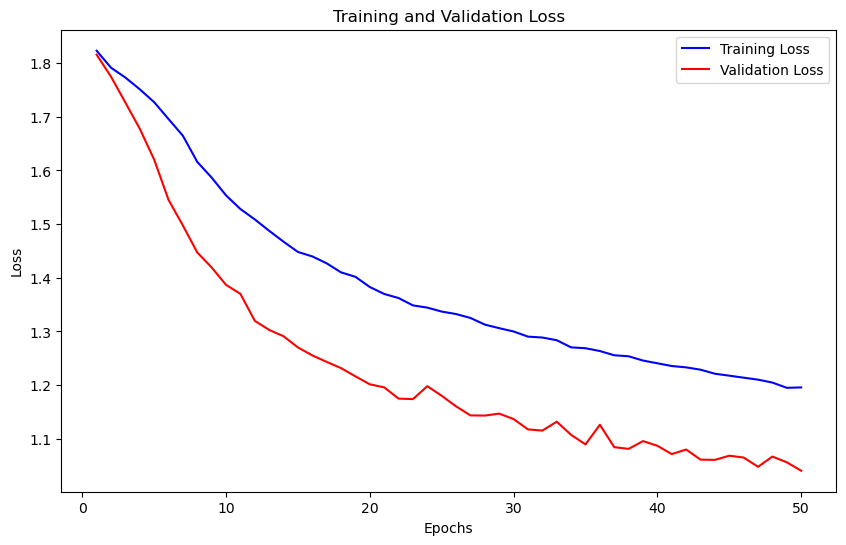

In [40]:
import matplotlib.pyplot as plt

# Extracting loss values from the history object
training_loss = emotion_model_info.history['loss']
validation_loss = emotion_model_info.history['val_loss']

# Extracting the number of epochs
epochs = range(1, len(training_loss) + 1)

# Plotting training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, 'b-', label='Training Loss')
plt.plot(epochs, validation_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
#########################

Model Training with data augmentation to improve accuracy.

In [33]:
# Import necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np

# Initialize image data generators
# For training data with data augmentation
train_data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# For validation data without data augmentation
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all training images
train_generator = train_data_gen.flow_from_directory(
    'images/train',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical')

# Preprocess all validation images
validation_generator = validation_data_gen.flow_from_directory(
    'images/test',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical')

# Create model structure (same as before)
emotion_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

# Compile the model
emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Train the model with the augmented data
emotion_model_info = emotion_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Evaluate the model on the validation set
val_loss, val_accuracy = emotion_model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


Found 28822 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/50
450/450 [==============================] - 257s 567ms/step - loss: 1.8229 - accuracy: 0.2476 - val_loss: 1.8156 - val_accuracy: 0.2661
Epoch 2/50
450/450 [==============================] - 236s 523ms/step - loss: 1.7913 - accuracy: 0.2507 - val_loss: 1.7746 - val_accuracy: 0.2666
Epoch 3/50
450/450 [==============================] - 241s 536ms/step - loss: 1.7729 - accuracy: 0.2634 - val_loss: 1.7263 - val_accuracy: 0.3104
Epoch 4/50
450/450 [==============================] - 240s 533ms/step - loss: 1.7511 - accuracy: 0.2792 - val_loss: 1.6776 - val_accuracy: 0.3330
Epoch 5/50
450/450 [==============================] - 246s 546ms/step - loss: 1.7272 - accuracy: 0.2987 - val_loss: 1.6202 - val_accuracy: 0.3679
Epoch 6/50
450/450 [==============================] - 241s 537ms/step - loss: 1.6957 - accuracy: 0.3191 - val_loss: 1.5452 - val_accuracy: 0.4108
Epoch 7/50
450/450 [===================

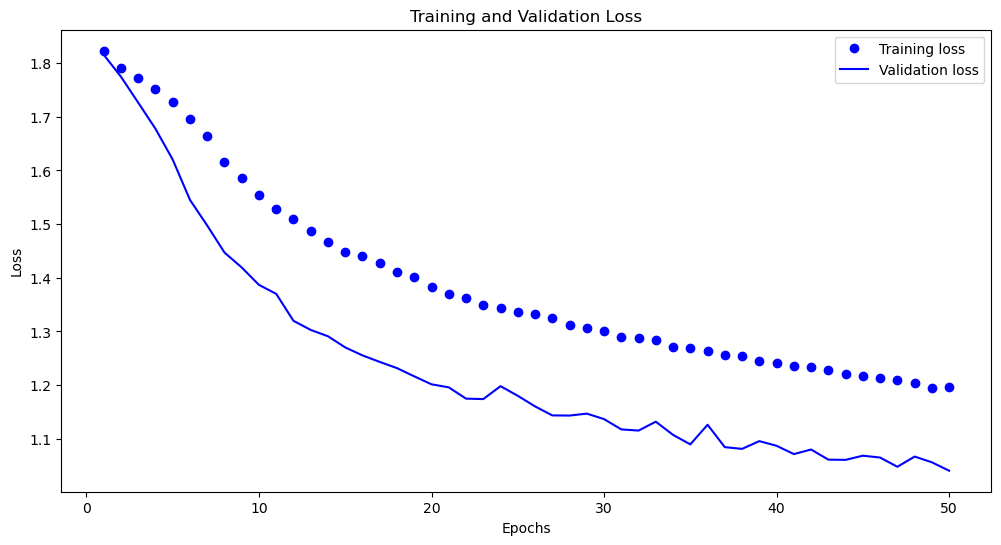

In [34]:
import matplotlib.pyplot as plt

# Extract the history from the training process
history = emotion_model_info.history

# Training and validation loss
loss = history['loss']
val_loss = history['val_loss']

epochs = range(1, len(loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Following the utilization of a Learning Rate Scheduler, which achieved a 63% accuracy, we proceeded to implement Data Augmentation in our emotion detection project in an effort to further enhance model performance. Despite our anticipation for improved robustness and recognition capabilities, the model's accuracy slightly decreased to 61% after applying Data Augmentation. 

In [ ]:
#########################

Model Training with Pre-trained model VGG16 to improve accuracy.

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all training images
train_generator = train_data_gen.flow_from_directory(
        'images/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="rgb",
        class_mode='categorical')

# Preprocess all validation images
validation_generator = validation_data_gen.flow_from_directory(
        'images/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="rgb",
        class_mode='categorical')

# Load VGG16 model pre-trained on ImageNet, without the top layer, adapted for grayscale input by duplicating channels
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of VGG16
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)

# This is the model to train
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)

# Print out the results
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')


Found 28822 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
58889256/58889256 [==============================] - 4s 0us/step
Epoch 1/50
450/450 [==============================] - 570s 1s/step - loss: 1.7993 - accuracy: 0.2605 - val_loss: 1.6528 - val_accuracy: 0.3425
Epoch 2/50
450/450 [==============================] - 564s 1s/step - loss: 1.7133 - accuracy: 0.3082 - val_loss: 1.6257 - val_accuracy: 0.3665
Epoch 3/50
450/450 [==============================] - 559s 1s/step - loss: 1.6879 - accuracy: 0.3228 - val_loss: 1.6181 - val_accuracy: 0.3692
Epoch 4/50
450/450 [==============================] - 557s 1s/step - loss: 1.6773 - accuracy: 0.3277 - val_loss: 1.5949 - val_accuracy: 0.3839
Epoch 5/50
450/450 [==============================] - 555s 1s/step - loss: 1.6689 - accuracy: 0.3343 - val_loss: 1.5876 - val_accuracy: 0.3855
Epoch 6/50
450/450 [==============================] - 567s 1s/step - loss: 1.6566 - accuracy: 0.3400 - val_loss: 1.5887 - val_accuracy:

In our final attempt to enhance the accuracy of our emotion detection model, we explored the utilization of a pre-trained model, specifically VGG16, known for its effectiveness in image recognition tasks. VGG16, a convolutional neural network model pre-trained on the ImageNet dataset, is widely acclaimed for its high accuracy in detecting and classifying a myriad of image types. The model achieved a validation accuracy of only 42%, the lowest among all our experiments. 

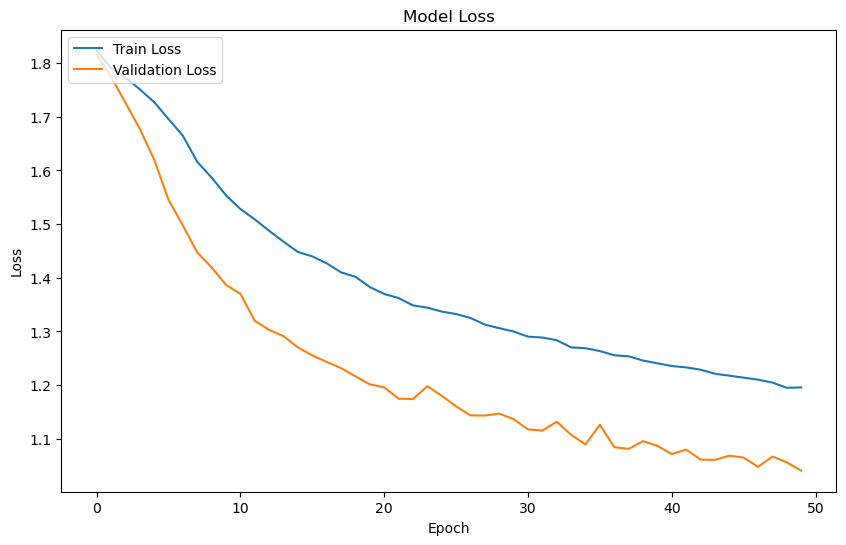

In [38]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(emotion_model_info.history['loss'], label='Train Loss')
plt.plot(emotion_model_info.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()


END OF CODING PART.